In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras import layers

import plot_utils

# set pallet to pastel
sns.set_palette("pastel")

In [143]:
dataset = pd.read_csv('csvs/lorenz.csv', header=0)
# eliminate all white spaces from the column names
dataset.columns = dataset.columns.str.replace(' ', '')

In [144]:
df_train= dataset[dataset['particle'] != 9]
df_test = dataset[dataset['particle'] == 9]


# drop column particles for the moment
df_train = df_train.drop(['particle'], axis=1)
df_test = df_test.drop(['particle'], axis=1)



In [145]:

# separate into X dataset and Y dataset, for now as dataframes
X_train = df_train['t']
Y_train = df_train.drop(['t'], axis=1)

X_test = df_test['t']
Y_test = df_test.drop(['t'], axis=1)

# scale the columns of the X and Y datasets
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
Y_train = scaler.fit_transform(Y_train)

X_test = scaler.fit_transform(X_test.values.reshape(-1, 1))
Y_test = scaler.fit_transform(Y_test)


In [146]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(3)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [147]:
dnn_model = build_and_compile_model()

In [148]:
history = dnn_model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=0, epochs=200)

In [203]:
def plot_loss(history, normalize=False):
  history_loss = history.history['loss']
  history_val_loss = history.history['val_loss']
  if normalize:
    history_loss = history.history['loss']/np.mean(X_train)
    history_val_loss = history.history['val_loss']/np.mean(X_train)

  
  plt.plot(history_loss, label='Loss')
  plt.plot(history_val_loss, label='Val loss')

  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('History Error')
  plt.legend()
  plt.grid(True)

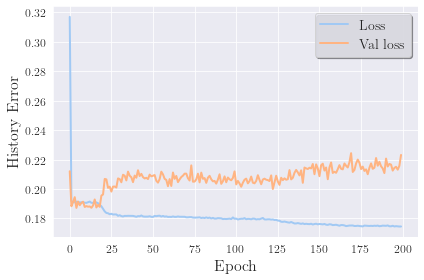

In [204]:

plot_loss(history, normalize=True)

plt.savefig('./Analysis/figs/history_ffn.pdf')


25/25 [==============================] - 0s 333us/step


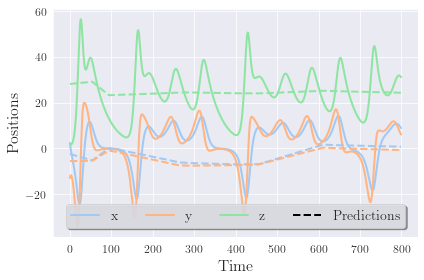

FFN average error:  10.832866040126037


In [211]:


#get pallet first three colors
colors = sns.color_palette("pastel", 3)

df_test = dataset[dataset['particle'] == 9]
# reset index
df_test = df_test.reset_index(drop=True)

test_predictions = dnn_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

pred_x = test_predictions[:, 0]
pred_y = test_predictions[:, 1]
pred_z = test_predictions[:, 2]


plt.plot(df_test['x'], label='x', color=colors[0])
plt.plot(df_test['y'], label='y', color=colors[1])
plt.plot(df_test['z'], label='z', color=colors[2])


# rescale the predictions

plt.plot(pred_x, linestyle='--', color=colors[0])
plt.plot(pred_y, linestyle='--', color=colors[1])
plt.plot(pred_z, linestyle='--', color=colors[2])


plt.plot([], linestyle='--', color='black', label='Predictions')
plt.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.5, 0.01))


plt.xlabel('Time')
plt.ylabel('Positions')
plt.savefig('./Analysis/figs/lorenz_ffn.pdf')

plt.show()


# print average errors for each model, relative to the test data
print("FFN average error: ", np.mean(np.abs(test_predictions - Y_test)))


/Users/haas/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


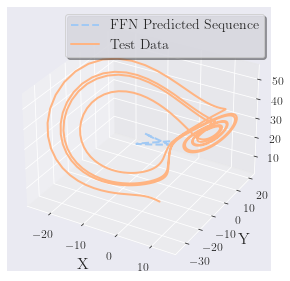

In [219]:
# plot in 3d
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the predicted sequence
ax.plot(pred_x, pred_y, pred_z, label='FFN Predicted Sequence',  linestyle='--')

# Plot the test data
ax.plot(df_test['x'], df_test['y'], df_test['z'], label='Test Data')

plt.legend()

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig('./Analysis/figs/lorenz_ffn_3d.pdf')
